In [1]:
%load_ext autoreload
%autoreload 2
    
import pandas as pd
pd.set_option('display.max_rows', 100)

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns

from utils import *

import sys
sys.path.append("../")

# Shows files

In [2]:
config_names = ["MESSI+\nSAX+\nSIMD",
               #"MESSI+\nSFA+ED",
               "MESSI+\nSFA+ED+\nSIMD",
               #"MESSI+\nSFA+EW",
               "MESSI+\nSFA+EW+\nSIMD"]

        
path = "logs/MESSI_SFA_logs_vdb"
all_files = read_logs(log_type="query", path=path, config_names = config_names)

Config logs/MESSI_SFA_logs_vdb/BIGANN_vdb/36
-----------------
Config logs/MESSI_SFA_logs_vdb/DEEP1B_vdb/36
-----------------
Config logs/MESSI_SFA_logs_vdb/SIFT1B_vdb/36
-----------------
Config logs/MESSI_SFA_logs_vdb/SPACEV1B_vdb/36
-----------------
Config logs/MESSI_SFA_logs_vdb/TEXTTOIMAGE_vdb/36
-----------------
Config logs/MESSI_SFA_logs_vdb/TURINGANNs_vdb/36
-----------------


In [3]:
query_times = pd.DataFrame(columns=["method", "querying time", "config", "dataset"])

i = 0
for ds_name, files in all_files.items():
    df_all = pd.DataFrame()
    for name, file in files.items():
        # print(file)
        df = pd.read_csv(file).iloc[:-1]  # last entry is the average        
        df["querying time"] = df["querying time"] / 1_000_000
        
        #print("Median:\t", name.replace("\n",""), "    \t", 
        #     np.round(df["querying time"].describe().loc["50%"], 3))  # * 10e-6

        df["method"] = name
        df["config"] = file.split("/")[3]
        df["dataset"] = file.split("/")[2].replace("_vdb","")
        df_all = pd.concat([df_all, df], ignore_index=True)        
        query_times = pd.concat([query_times, df[["method", "querying time", "config", "dataset"]]], ignore_index=True)

        i = i+1
        
subset = query_times.rename(columns={
    "config":"Cores", "dataset": "Dataset", "method": "Method",
    "querying time" : "query time in s"})
# subset = subset[query_times.method.isin(["MESSI+\nSAX+\nSIMD", "MESSI+\nSFA+ED+\nSIMD", "MESSI+\nSFA+EW+\nSIMD"])]
subset = subset[query_times.method.isin(["MESSI+\nSAX+\nSIMD", "MESSI+\nSFA+EW+\nSIMD"])]
subset.Method.replace("MESSI+\nSAX+\nSIMD", "MESSI", inplace=True)
subset.Method.replace("MESSI+\nSFA+EW+\nSIMD", "SOFA", inplace=True)

subset

,Method,query time in s,Cores,Dataset
0,MESSI,0.436782,36,BIGANN
1,MESSI,0.191114,36,BIGANN
2,MESSI,0.243966,36,BIGANN
3,MESSI,0.215025,36,BIGANN
4,MESSI,0.041316,36,BIGANN
...,...,...,...,...
1795,SOFA,0.861082,36,TURINGANNs
1796,SOFA,0.836135,36,TURINGANNs
1797,SOFA,0.829711,36,TURINGANNs
1798,SOFA,0.863331,36,TURINGANNs


In [4]:
UCR_SUITE_all_files = read_UCR_logs_vdb()
UCR_SUITE_query_times = pd.DataFrame(columns=["Method", "query time in s", "Cores", "Dataset"])

i = 0
for ds_name, files in UCR_SUITE_all_files.items():
    df_all = pd.DataFrame()
    for config, file in files.items():
        # print(file)
        df = pd.read_csv(file) #.iloc[:-1]
        # display(df)
        df["query time in s"] = df[" querying time"] / 1e6        
        df["Method"] = "UCR SUITE"
        if config == "9":
            config = "09"
        df["Cores"] = config
        name = file.split("/")[2]
    
        df["Dataset"] = name[:name.rfind("_")]
        df_all = pd.concat([df_all, df], ignore_index=True)        
        UCR_SUITE_query_times = pd.concat([
            UCR_SUITE_query_times, df[["Method", "query time in s", "Cores", "Dataset"]]], ignore_index=True)
        i = i+1
        
UCR_SUITE_query_times

,Method,query time in s,Cores,Dataset
0,UCR SUITE,0.501079,36,BIGANN
1,UCR SUITE,0.599190,36,BIGANN
2,UCR SUITE,0.455667,36,BIGANN
3,UCR SUITE,0.413825,36,BIGANN
4,UCR SUITE,0.230298,36,BIGANN
...,...,...,...,...
595,UCR SUITE,0.686450,36,TURINGANNs
596,UCR SUITE,0.622147,36,TURINGANNs
597,UCR SUITE,0.694773,36,TURINGANNs
598,UCR SUITE,0.603984,36,TURINGANNs


In [5]:
FAISS_all_files = read_faiss_logs_vdb()
FAISS_query_times = pd.DataFrame(columns=["Method", "query time in s", "Cores", "Dataset"])

i = 0
for ds_name, files in FAISS_all_files.items():
    df_all = pd.DataFrame()
    for config, file in files.items():
        # print(file)
        df = pd.read_csv(file) #.iloc[:-1]
        # display(df)
        df["query time in s"] = df[" total"] / 100 / 1000
        df["Method"] = "FAISS"
        if config == "9":
            config = "09"
        df["Cores"] = config
        name = file.split("/")[2]
        df["Dataset"] = name[name.find("_")+1:name.rfind("_")].replace("_1", "")
        
        df_all = pd.concat([df_all, df], ignore_index=True)        
        FAISS_query_times = pd.concat([
            FAISS_query_times, df[["Method", "query time in s", "Cores", "Dataset"]]], ignore_index=True)
        i = i+1
        
FAISS_query_times

,Method,query time in s,Cores,Dataset
0,FAISS,0.180167,36,BIGANN
1,FAISS,0.180167,36,BIGANN
2,FAISS,0.180167,36,BIGANN
3,FAISS,0.180167,36,BIGANN
4,FAISS,0.180167,36,BIGANN
...,...,...,...,...
595,FAISS,0.489100,36,TURINGANNs
596,FAISS,0.489100,36,TURINGANNs
597,FAISS,0.489100,36,TURINGANNs
598,FAISS,0.489100,36,TURINGANNs


In [6]:
np.unique(FAISS_query_times.Dataset)

array(['BIGANN', 'DEEP1B', 'SIFT1B', 'SPACEV1B', 'TEXTTOIMAGE',
       'TURINGANNs'], dtype=object)

In [7]:
np.unique(subset.Dataset)

array(['BIGANN', 'DEEP1B', 'SIFT1B', 'SPACEV1B', 'TEXTTOIMAGE',
       'TURINGANNs'], dtype=object)

In [8]:
np.unique(UCR_SUITE_query_times.Dataset)

array(['BIGANN', 'DEEP1B', 'SIFT1B', 'SPACEV1B', 'TEXTTOIMAGE',
       'TURINGANNs'], dtype=object)

In [9]:
subset = pd.concat([subset, UCR_SUITE_query_times, FAISS_query_times], ignore_index=True)
subset

,Method,query time in s,Cores,Dataset
0,MESSI,0.436782,36,BIGANN
1,MESSI,0.191114,36,BIGANN
2,MESSI,0.243966,36,BIGANN
3,MESSI,0.215025,36,BIGANN
4,MESSI,0.041316,36,BIGANN
...,...,...,...,...
2395,FAISS,0.489100,36,TURINGANNs
2396,FAISS,0.489100,36,TURINGANNs
2397,FAISS,0.489100,36,TURINGANNs
2398,FAISS,0.489100,36,TURINGANNs


In [10]:
np.unique(subset.Dataset)

array(['BIGANN', 'DEEP1B', 'SIFT1B', 'SPACEV1B', 'TEXTTOIMAGE',
       'TURINGANNs'], dtype=object)

In [11]:
subset.Method.replace("MESSI+SAX+SIMD", "MESSI 1.0", inplace=True)
subset.Method.replace("MESSI+SFA+EW+SIMD", "MESSI 2.0", inplace=True)
subset

,Method,query time in s,Cores,Dataset
0,MESSI,0.436782,36,BIGANN
1,MESSI,0.191114,36,BIGANN
2,MESSI,0.243966,36,BIGANN
3,MESSI,0.215025,36,BIGANN
4,MESSI,0.041316,36,BIGANN
...,...,...,...,...
2395,FAISS,0.489100,36,TURINGANNs
2396,FAISS,0.489100,36,TURINGANNs
2397,FAISS,0.489100,36,TURINGANNs
2398,FAISS,0.489100,36,TURINGANNs


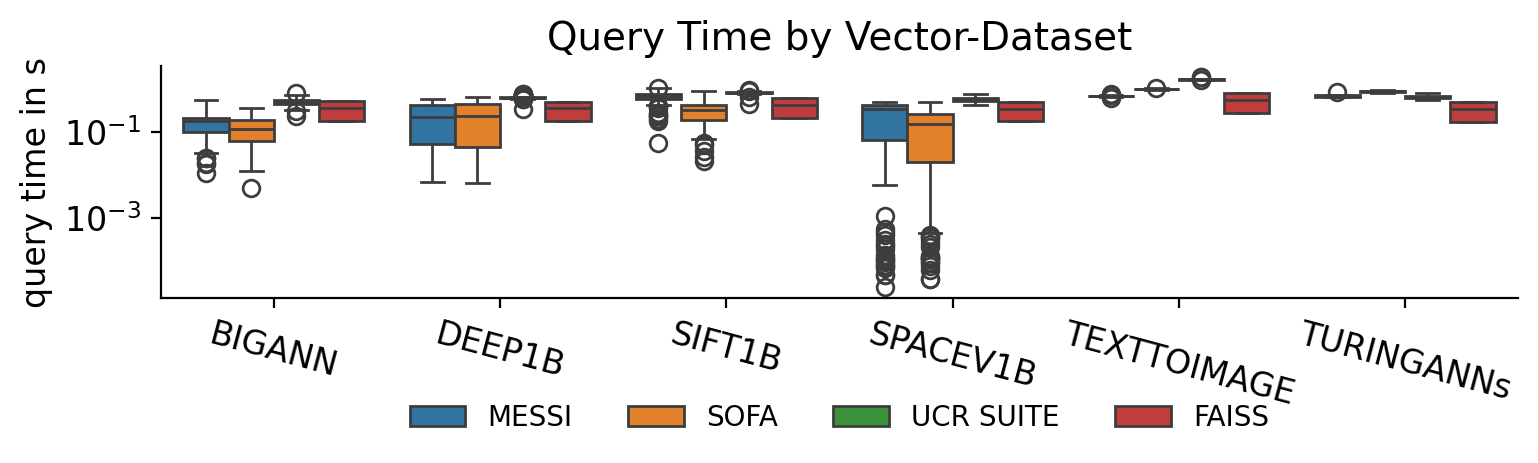

In [20]:

with plt.style.context({
    'font.size': 16,          # Default font size
    'axes.titlesize': 14,     # Font size for axes titles
    'axes.labelsize': 12,     # Font size for x and y labels
    'xtick.labelsize': 12,    # Font size for x tick labels
    'ytick.labelsize': 12,    # Font size for y tick labels
    'legend.fontsize': 10,    # Font size for legend
    'figure.titlesize': 14    # Font size for figure title
}):
    fig, ax = plt.subplots(figsize=(8,3))
    ax.set_title("Query Time by Vector-Dataset")
    sns.despine()
    ax.set_yscale("log")

    sns.boxplot(hue="Method", y="query time in s", x="Dataset", data=subset, ax=ax) # , width=.7
    ax.set_xlabel("")
    
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=-15)

    legend = ax.legend() # removes the title    
    sns.move_legend(ax, "upper center", frameon=False, bbox_to_anchor=(.5, -0.35), ncol=4)
    plt.tight_layout()
        
    plt.savefig("images/experiment_boxplot_mean_query_time_vdb.pdf", bbox_inches='tight')
    plt.show()

In [13]:
result = subset.groupby(["Method"])["query time in s"].median().transform(lambda l: str(np.round(l * 1000))+" ms")
result

Method
FAISS        345.0 ms
MESSI        496.0 ms
SOFA         324.0 ms
UCR SUITE    630.0 ms
Name: query time in s, dtype: object